In [61]:
from sklearn.datasets import load_iris
import numpy as ny
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
#%matplotlib inline

In [62]:
iris = load_iris()
data = iris["data"][:,:2]
labels = iris["target"]
data

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [63]:
N, M = data.shape
print(N, M)

(150, 2)


In [64]:
Y = labels.reshape((N, 1))
Y = ny.array(Y==2).astype(int)
#Y

In [65]:
X = StandardScaler().fit_transform(data)

In [66]:
X = X.T

In [67]:
bias = ny.ones((1, N))

In [68]:
XB = ny.vstack((bias, X))

In [69]:
class LogisitcRegression:
    def __init__(self, alpha, gens):
        self.alpha = alpha
        self.gens = gens
    def sigmoid(self, x):
        return 1.0/(1+ny.exp(-x))
    def prediction(self):
        return self.sigmoid(self.weights.T.dot(self.X).T)
    def calculatePenalty(self):
        self.H = self.prediction()
        component1 = ny.sum(self.y*ny.log(self.H))
        component2 = ny.sum((1-self.y)*ny.log(1-self.H))
        return -ny.sum(component1 + component2)/self.N
    def updateWeights(self):
        nabla = self.alpha*((self.y - self.H).T.dot(self.X.T).T)
        #print(nabla)
        self.weights += nabla
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.M, self.N = X.shape
        self.weights = ny.zeros((self.M, 1))
        #self.H = self.predict()
        #print(H)  
        #J = self.calculatePenalty()
        #print(J)
        #self.updateWeights()
        #print(self.weights)
        self.buffer = []
        for g in ny.arange(self.gens):
            self.buffer.append(self.calculatePenalty())
            #print(self.calculatePenalty())
            self.updateWeights()   
            #print(self.weights)
    def plotErrorCurve(self):
        plt.plot(ny.array(self.buffer))
    def predict(self, t):
        return self.weights.T.dot(t)>=0.5
    def getWeights(self):
        return self.weights

In [70]:
clf = LogisitcRegression(alpha=0.001, gens=5000)

In [71]:
clf.fit(XB, Y)

In [72]:
clf.plotErrorCurve()

In [73]:
predictions = []
for i in ny.arange(XB.shape[1]):
    predictions.append(clf.predict(XB[:,i]))

In [74]:
print(ny.array(predictions).flatten().astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 0 0]


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
score = accuracy_score(Y, predictions)

In [77]:
print(score)

0.753333333333


In [78]:
X = X.T

In [79]:
#print(X.shape)
ax1_min, ax1_max = X[:,0].min(), X[:,0].max()
ax = ny.linspace(ax1_min, ax1_max, 50)
print(ax)

[ -1.87002413e+00  -1.78100284e+00  -1.69198155e+00  -1.60296026e+00
  -1.51393896e+00  -1.42491767e+00  -1.33589638e+00  -1.24687509e+00
  -1.15785379e+00  -1.06883250e+00  -9.79811208e-01  -8.90789916e-01
  -8.01768623e-01  -7.12747330e-01  -6.23726038e-01  -5.34704745e-01
  -4.45683453e-01  -3.56662160e-01  -2.67640868e-01  -1.78619575e-01
  -8.95982824e-02  -5.76989859e-04   8.84443027e-02   1.77465595e-01
   2.66486888e-01   3.55508180e-01   4.44529473e-01   5.33550766e-01
   6.22572058e-01   7.11593351e-01   8.00614643e-01   8.89635936e-01
   9.78657228e-01   1.06767852e+00   1.15669981e+00   1.24572111e+00
   1.33474240e+00   1.42376369e+00   1.51278498e+00   1.60180628e+00
   1.69082757e+00   1.77984886e+00   1.86887015e+00   1.95789145e+00
   2.04691274e+00   2.13593403e+00   2.22495532e+00   2.31397662e+00
   2.40299791e+00   2.49201920e+00]


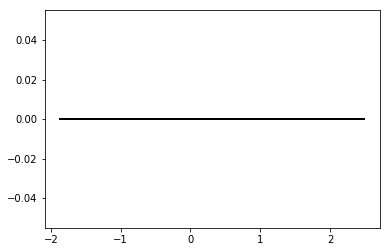

In [83]:
markers = ['*','^']
colours = ['red', 'black']
#for i in ny.arange(len(markers)):
    #plt.scatter(X[Y[:,0]==i, 0], X[Y[:,0]==i,1], marker=markers[i])
W = clf.getWeights()
line_vals = ny.zeros((50, 1))
plt.plot(ax, line_vals,'k', linewidth=2)
plt.show()    

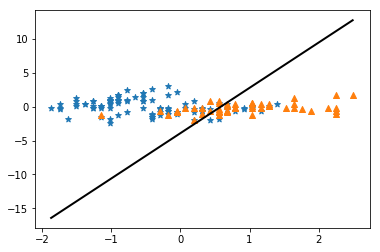

In [81]:
markers = ['*','^']
colours = ['red', 'black']
for i in ny.arange(len(markers)):
    plt.scatter(X[Y[:,0]==i, 0], X[Y[:,0]==i,1], marker=markers[i])
W = clf.getWeights()
line_vals = -(W[0,0]+W[1,0]*ax)/W[2,0]
plt.plot(ax, line_vals,'k', linewidth=2)
plt.show()    